In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
import torchvision.datasets as dset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR
import models

def show_images(imgs):
    NUM = imgs.shape[0]

    sqrtn = int(np.ceil(np.sqrt(NUM)))
    sqrtimg = int(np.ceil(np.sqrt(NUM)))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(imgs):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img)
    return


#MNIST_DATA = fetch_mldata('MNIST original')

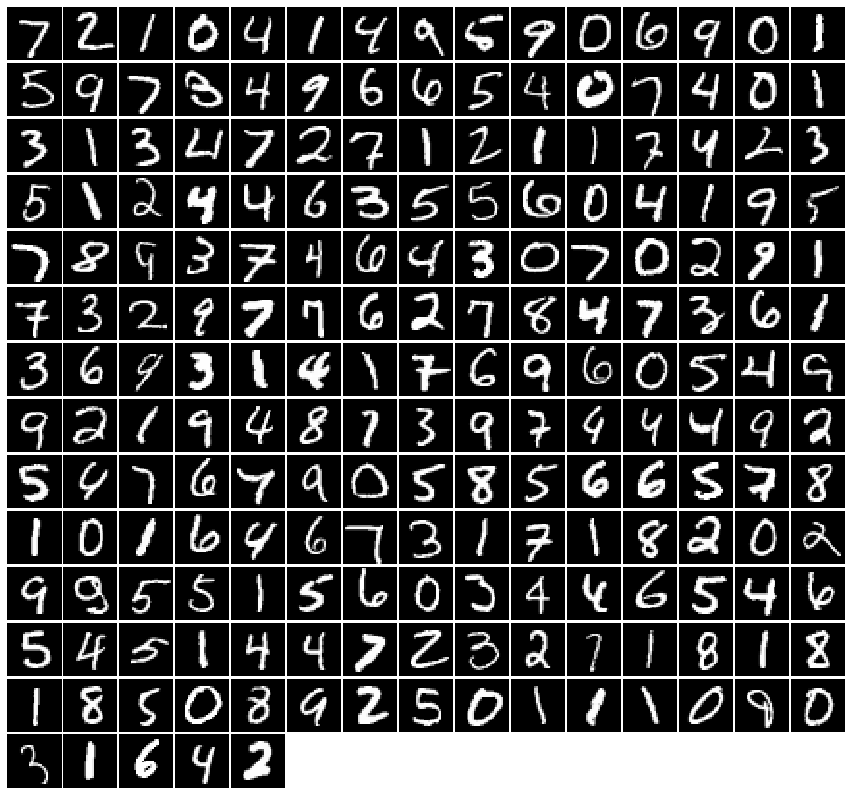

In [3]:
MNIST = dset.MNIST('../datasets/', train=False, download=True,transform=T.ToTensor())

BATCH_SIZE = 20 
train_loader = DataLoader(MNIST, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(MNIST, batch_size=200, shuffle=False)

imgs = train_loader.__iter__().next()[0].numpy().squeeze()
imgs = test_loader.__iter__().next()[0].numpy().squeeze()
show_images(imgs)

In [31]:
MNIST.test_data.numpy().reshape(10000,-1)

(10000, 28, 28)

In [5]:
dtype = torch.FloatTensor
use_cuda =torch.cuda.is_available()
if use_cuda ==True:torch.cuda.FloatTensor

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data

In [6]:
torch.cuda.is_available()

False

In [20]:
net = models.MLP(input_dim=28*28, output_dim = 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001, nesterov= True)
# optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001, nesterov= True)
#optimizer = optim.Adam(net.parameters(), lr=0.005, weight_decay=0.002)
#scheduler = MultiStepLR(optimizer, [100, 150,200], gamma=0.1)
scheduler = MultiStepLR(optimizer, [5, 10], gamma=0.1)
# scheduler = ExponentialLR(optimizer,gamma=0.95)
# scheduler = ReduceLROnPlateau(optimizer, 'max', patience =3,min_lr= 0.00001)
#5e-3 86
if use_cuda:
    criterion.cuda()
    net.cuda()
#     resnet101 = torch.nn.DataParallel(resnet101, device_ids=range(torch.cuda.device_count()))
#     cudnn.benchmark = True   
hist= train(epoch=150,early_stopping= 20)


This is epoch:1

 8
 7
 1
 1
 7
 4
 6
 5
 1
 9
 2
 2
 3
 4
 5
 5
 1
 1
 3
 2
[torch.LongTensor of size 20]

torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])


RuntimeError: size mismatch, m1: [560 x 28], m2: [784 x 1600] at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/TH/generic/THTensorMath.c:1293

In [ ]:
def layer_info():


In [11]:
k=train_loader.__iter__().next()[0]

In [16]:
k.size()
#k =k.view(20,28*28)


torch.Size([20, 784])

In [ ]:
torch.save(net.state_dict(), 'resnet50_ang_loss.pth')